In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
%cd '/content/drive/MyDrive/ML-DL/CodeGym'
!ls

/content/drive/MyDrive/ML-DL/CodeGym
GDPlist.csv				  Untitled1.ipynb  Untitled6.ipynb
house_price_Dống-Da_Hà-Nội_subdata.csv	  Untitled2.ipynb  Untitled7.ipynb
OnlineRetail.csv			  Untitled3.ipynb  Untitled8.ipynb
shopeep_koreantop_clothing_shop_data.csv  Untitled4.ipynb
Untitled0.ipynb				  Untitled5.ipynb


In [ ]:
df = pd.read_csv('house_price_Dống-Da_Hà-Nội_subdata.csv', encoding="latin1")
df.head(3)

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo


In [ ]:
df.isnull().sum()

area                   6
price                 54
postDate               0
land_certificate     302
house_direction      629
balcony_direction    647
toilet               431
bedroom              351
floor                305
lat                    0
long                   0
property_type          0
dtype: int64

In [ ]:
df['land_certificate'] = df['land_certificate'].fillna("no information")

In [ ]:
df['area'].value_counts()

0.0      41
35.0     34
45.0     33
55.0     31
50.0     27
         ..
365.0     1
78.8      1
158.0     1
22.0      1
107.0     1
Name: area, Length: 127, dtype: int64

In [ ]:
df['area'] = df['area'].fillna(0.0)

In [ ]:
df['house_direction'].value_counts()

dong-Nam    17
Tay-Nam      8
Tay-Bac      6
dong-Bac     4
Nam          3
dong         3
Bac          1
Name: house_direction, dtype: int64

In [ ]:
df['house_direction'] = df['house_direction'].fillna('dong-Nam')

In [ ]:
df['balcony_direction'].value_counts()

dong-Nam    11
Tay-Nam      4
Tay-Bac      3
Nam          2
dong         2
Bac          1
dong-Bac     1
Name: balcony_direction, dtype: int64

In [ ]:
df['balcony_direction'] = df['balcony_direction'].fillna('dong-Nam')

In [ ]:
df['toilet'].value_counts()

4.0     65
1.0     55
3.0     37
2.0     23
5.0     21
6.0     15
7.0     10
8.0      7
10.0     2
12.0     2
11.0     2
16.0     1
Name: toilet, dtype: int64

In [ ]:
df['toilet'] = df['toilet'].fillna(4.0)

In [ ]:
df['bedroom'].value_counts()

3.0     75
4.0     56
6.0     49
2.0     46
5.0     29
1.0     25
8.0     14
10.0    10
7.0      6
9.0      3
14.0     2
12.0     2
11.0     2
22.0     1
Name: bedroom, dtype: int64

In [ ]:
df['bedroom'] = df['bedroom'].fillna(3.0)

In [ ]:
df['floor'].value_counts()

5.0     121
4.0      97
6.0      33
3.0      29
7.0      28
2.0      19
8.0      18
1.0      13
9.0       7
11.0      1
Name: floor, dtype: int64

In [ ]:
df['floor'] = df['floor'].fillna(5.0)

In [ ]:
df.isnull().sum()

area                  0
price                54
postDate              0
land_certificate      0
house_direction       0
balcony_direction     0
toilet                0
bedroom               0
floor                 0
lat                   0
long                  0
property_type         0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df1 = df[(df['area'] > 0)]

In [ ]:
df1.isnull().sum()

area                 0
price                0
postDate             0
land_certificate     0
house_direction      0
balcony_direction    0
toilet               0
bedroom              0
floor                0
lat                  0
long                 0
property_type        0
dtype: int64

In [ ]:
df1['P/A'] = df1['price'] / df1['area']
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,P/A
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo,294.000000
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo,73.684211
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo,177.419355
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo,111.538462
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo,98.750000


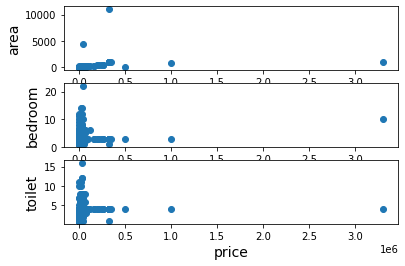

In [ ]:
x1 = df1['price']
y1 = df1['area']
y2 = df1['bedroom']
y3 = df1['toilet']

fig, ax = plt.subplots(3, 1)

ax[0].scatter(x1, y1)
ax[1].scatter(x1, y2)
ax[2].scatter(x1, y3)

ax[0].set_ylabel('area', fontsize = 14)
ax[1].set_ylabel('bedroom', fontsize = 14)
ax[2].set_xlabel('price', fontsize = 14)
ax[2].set_ylabel('toilet', fontsize = 14) 

plt.show()

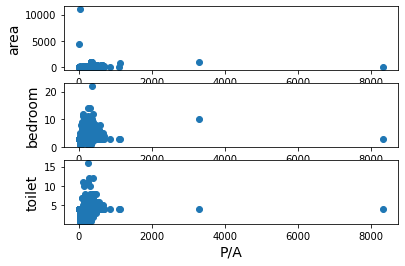

In [ ]:
x1 = df1['P/A']
y1 = df1['area']
y2 = df1['bedroom']
y3 = df1['toilet']

fig, ax = plt.subplots(3, 1)

ax[0].scatter(x1, y1)
ax[1].scatter(x1, y2)
ax[2].scatter(x1, y3)

ax[0].set_ylabel('area', fontsize = 14)
ax[1].set_ylabel('bedroom', fontsize = 14)
ax[2].set_xlabel('P/A', fontsize = 14)
ax[2].set_ylabel('toilet', fontsize = 14) 

plt.show()